In [1]:
import sys, os

path = os.getcwd()
pwd_path = os.path.abspath(os.path.join(path, os.pardir))
sys.path.append(pwd_path)

In [2]:
import json
import numpy as np
from matplotlib import pyplot as plt
import numpy as np
from model.manicast import ManiCast
import torch
from IPython.display import display, clear_output
from data.utils import comad_viz
%matplotlib inline

relevant_joints=['BackTop', 'LShoulderBack', 'RShoulderBack',
                'LElbowOut', 'RElbowOut', 'LWristOut', 'RWristOut', 'WaistLBack', 'WaistRBack']

#Change these values to desired model names, and data episode paths:
model_name = 'base'

dataset_folder = f"{pwd_path}/data/comad_data/"
mapping_file = f"{pwd_path}/data/mapping.json"

episode_file = f"{dataset_folder}handover/train/handover_4.json"

device = 'cuda' ## change to cpu if no GPU
model = ManiCast(3,10, 25, .1, 7, 4,[3,3],0.0).to(device)

model.load_state_dict(torch.load(f'{pwd_path}/model_checkpoints/{model_name}'))
model.eval()

with open(mapping_file, 'r') as f:
    mapping = json.load(f)

with open(episode_file, 'r') as f:
    data = json.load(f)

KeyboardInterrupt: 

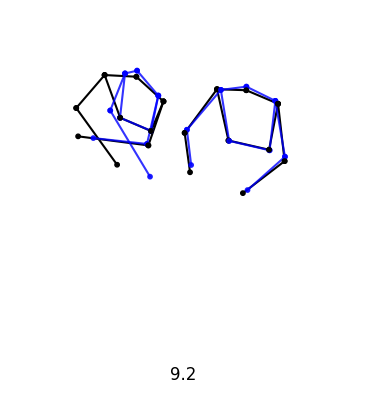

In [3]:
person_data = {}
fig = plt.figure(figsize=(10,4.5))
ax = fig.add_subplot(projection='3d')
prev_A = [[],[],[]]
prev_B = [[],[],[]]
figures_A = [[[],[]],[[],[]],[[],[]]]   
figures_B = [[[],[]],[[],[]],[[],[]]]   
        

p_x=np.linspace(-10,10,15)
p_y=np.linspace(-10,10,15)
X,Y=np.meshgrid(p_x,p_y)

for stream_person in data:
    person_data[stream_person] = np.array(data[stream_person])

ax.set_xlim3d([0, 1])
ax.set_ylim3d([0, 1])
ax.set_zlim3d([1.2,2.2]) 
plt.axis('off')
for timestep in range(0, len(data[list(data.keys())[0]]), 20):
    print(round(timestep/120, 1))
    joint_data_A = person_data["Kushal"]
    joint_data_B = person_data["Prithwish"]
    current_joints_A, future_joints_A, forecast_joints_A = comad_viz.get_joints(joint_data_A, timestep, mapping, device, model)
    current_joints_B, future_joints_B, forecast_joints_B = comad_viz.get_joints(joint_data_B, timestep, mapping, device, model)

    comad_viz.get_point_array(current_joints=current_joints_A, 
                    future_joints=None, 
                    forecast_joints=forecast_joints_A, figures=figures_A, timestep=timestep, ax=ax, prev=prev_A, threshold=100)
    comad_viz.get_point_array(current_joints=current_joints_B, 
                    future_joints=None, 
                    forecast_joints=forecast_joints_B, figures=figures_B, timestep=timestep, ax=ax, prev=prev_B, threshold=.8)
    plt.title(str(round(timestep/120, 1)),y=-0.1)
    clear_output(wait=True)
    display(fig)
    
    